In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import os
%matplotlib inline
%load_ext autoreload
%autoreload 2

### plot the validation perplexity of opt models

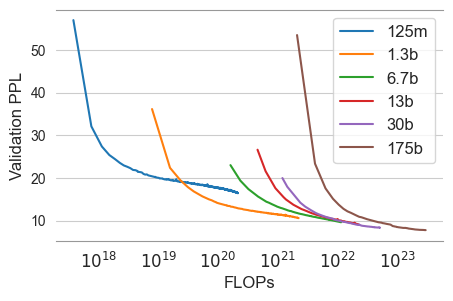

In [4]:
# load perplexity file
from utils import load_opt_validation_ppl, get_flops, get_num_tokens
ppls = load_opt_validation_ppl()

# plot the perplexity
sns.set_style("whitegrid")
task = "valid/combined"
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
for model_size in ppls:
    for i, type in enumerate(["FLOPs"]): # Tokens, Steps
        xs = []
        ys = []
        updates = sorted(ppls[model_size][task].keys())
        
        for key in updates:
            if type == "FLOPs":
                v = get_flops(model_size, key)
            elif type == "Tokens":
                v = get_num_tokens(model_size, key)
            else:
                v = key
            xs.append(v)
            ys.append(ppls[model_size][task][key])
    
        axes.plot(np.log10(xs), ys, label=model_size.split("_")[1])
        axes.set_xlabel(f"{type}", fontsize=12)
        axes.set_ylabel("Validation PPL", fontsize=12)
        if type == "FLOPs":
            FLOPs = range(18, 24)
            axes.set_xticks(list(FLOPs), [f"$10^{{{x}}}$" for x in FLOPs], fontsize=12)
        axes.xaxis.grid(False)
plt.legend(fontsize=12)
sns.despine(left=True, bottom=False, top=False)
axes.spines['top'].set_color('#989898')
axes.spines['bottom'].set_color('#989898')

output_file = "images/validation_ppl.pdf"
if not os.path.exists(output_file):
    plt.savefig("images/validation_ppl.pdf", bbox_inches='tight')